In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/bittlingmayer/amazonreviews/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdelazizhanyzaid
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/bittlingmayer/amazonreviews


100%|██████████| 493M/493M [00:08<00:00, 63.7MB/s]


## 1-Data Exploration

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import re
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils

from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

import warnings
warnings.filterwarnings("ignore")
# For text processing
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## 2: Functions Prepareing

### Process function

In [ ]:
'''Build a function to convert data into a data frame with 2 columns: label, text,
The function takes the file or the train/test data
and a for loop loops over the text in the file to split texts from labels'''

def process_data(file):
    data = []
    for index, row in file.iterrows():
         # first line data is raw data
        line = row[0]

        #split lines into text and labels
        label, text = line.split(' ', 1)

        #remove the __label__ only keep the number
        label = label.replace('__label__', '')

        #append
        data.append((label, text.strip()))

    cols = ['label', 'review']
    return pd.DataFrame(data, columns=cols)

## Clean Function

In [ ]:
# Download stopwords and WordNet data (if not already downloaded)
from nltk.stem import WordNetLemmatizer



def text_cleaning(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Removing Special Characters, Numbers and Punctuation (Your Line)
    pattern_punc = r'[^A-Za-z\s]'  # Define your punctuation pattern
    text = re.sub(pattern_punc, '', text).strip()

    # 3. Removing Stop Words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # 4. Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    # 5. Removing Extra Whitespaces
    text = re.sub(' +', ' ', text).strip()

    return text

In [ ]:
train_path = '/content/amazonreviews/train.ft.txt.bz2'
test_path = '/content/amazonreviews/test.ft.txt.bz2'

## 3: Reading Data

In [ ]:
train_data = pd.read_csv(train_path, compression='bz2', delimiter='\t')
test_data = pd.read_csv(test_path, compression='bz2', delimiter='\t')
print(train_data.head())

  __label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0  __label__2 The best soundtrack ever to anythin...                                                                                                                                                                                                                                                                                                                                                                                                   
1  __label__2 Amazing!: This soundtrack is my fav...                                                                    

In [ ]:
print(train_data.head(1))

  __label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0  __label__2 The best soundtrack ever to anythin...                                                                                                                                                                                                                                                                                                                                                                                                   


In [ ]:
print("Train data shape" ,train_data.shape)
print("Test data shape" ,test_data.shape)

Train data shape (3599999, 1)
Test data shape (399999, 1)


In [ ]:
train = process_data(train_data)
train.head()

,label,review
0,2,The best soundtrack ever to anything.: I'm rea...
1,2,Amazing!: This soundtrack is my favorite music...
2,2,Excellent Soundtrack: I truly like this soundt...
3,2,"Remember, Pull Your Jaw Off The Floor After He..."
4,2,an absolute masterpiece: I am quite sure any o...


In [ ]:
test = process_data(test_data)
test.head()

,label,review
0,2,One of the best game music soundtracks - for a...
1,1,Batteries died within a year ...: I bought thi...
2,2,"works fine, but Maha Energy is better: Check o..."
3,2,Great for the non-audiophile: Reviewed quite a...
4,1,DVD Player crapped out after one year: I also ...


In [ ]:
df_test=test.copy()
df_train=train.copy()
print("Train data shape" ,df_train.shape)
print("Test data shape" ,df_test.shape)

Train data shape (3599999, 2)
Test data shape (399999, 2)


In [ ]:
print(df_train['label'].value_counts())
print("-"*45)
print(df_test['label'].value_counts())

label
1    1800000
2    1799999
Name: count, dtype: int64
---------------------------------------------
label
1    200000
2    199999
Name: count, dtype: int64


In [ ]:
df_train['label'].value_counts()
df_test['label'].value_counts()
df_train['label'] = df_train['label'].replace({"2":"1", "1":"0"}) #train data
df_test['label'] = df_test['label'].replace({"2":"1", "1":"0"}) #test data

In [ ]:
print(df_train['label'].value_counts())
print(df_test['label'].value_counts())

label
0    1800000
1    1799999
Name: count, dtype: int64
label
0    200000
1    199999
Name: count, dtype: int64


In [ ]:
df_train['label'].dtype

dtype('O')

In [ ]:
df_train['label'] = df_train['label'].astype(int)
df_test['label'] = df_test['label'].astype(int)

## Get sample from train data

In [ ]:
import pandas as pd

# Sample a maximum of 250,000 rows from class 0, or all rows if fewer
train_0 = df_train[df_train['label'] == 0].sample(n=min(250000, len(df_train[df_train['label'] == 0])), random_state=42)
test_0 = df_test[df_test['label'] == 0].sample(n=min(15000, len(df_test[df_test['label'] == 0])), random_state=42)


# Sample a maximum of 250,000 rows from class 1, or all rows if fewer
train_1 = df_train[df_train['label'] == 1].sample(n=min(250000, len(df_train[df_train['label'] == 1])), random_state=42)
test_1 = df_test[df_test['label'] == 1].sample(n=min(15000, len(df_test[df_test['label'] == 1])), random_state=42)

# Concatenate the samples
train_df = pd.concat([train_0, train_1])
test_df = pd.concat([test_0, test_1])

# Shuffle the balanced DataFrame
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the balance
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())

label
0    250000
1    250000
Name: count, dtype: int64
label
0    15000
1    15000
Name: count, dtype: int64


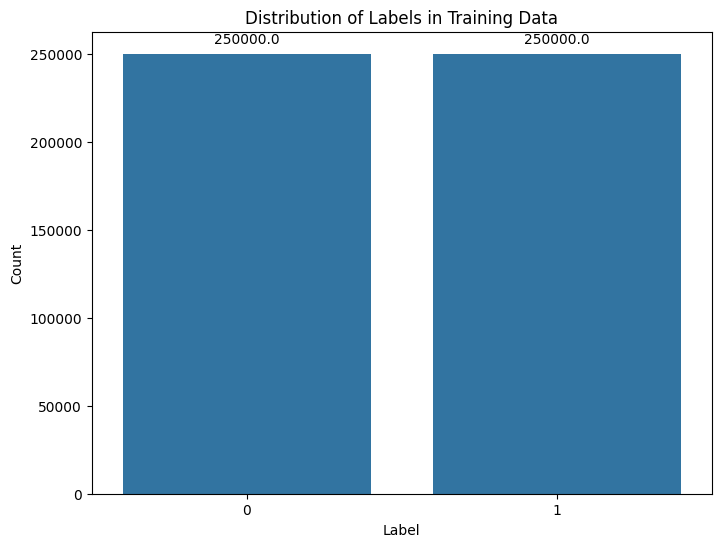

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
label_counts = train_df['label'].value_counts()

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=train_df, order=['0', '1'])
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Add label count numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

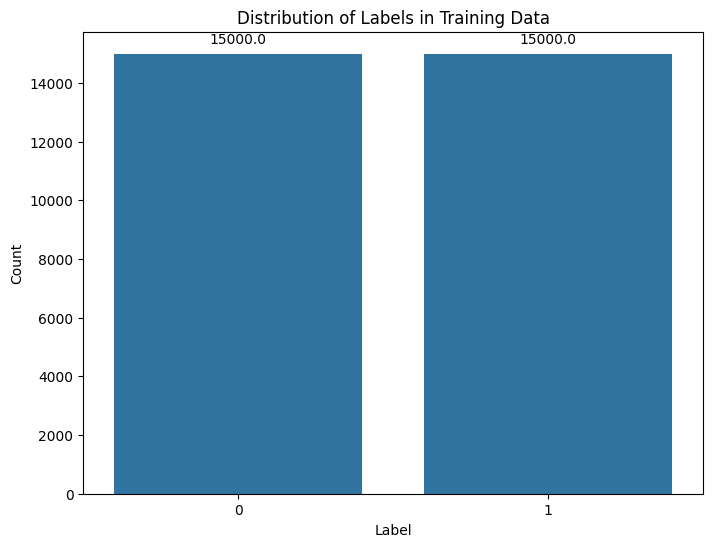

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
label_counts = test_df['label'].value_counts()

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=test_df, order=['0', '1'])
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Add label count numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## 4- Cleaned Data

In [ ]:
train_df['review_cleaned'] = train_df['review'].apply(text_cleaning)
train_df.head()

,label,review,review_cleaned
0,0,A True Disapointment: As a huge fan of this au...,true disapointment huge fan author disapointed...
1,0,The tv show is much better.: This movie could ...,tv show much better movie could give excelent ...
2,0,"There is two dp-301U models, not one: Reviews ...",two dpu model one review different item two di...
3,0,Frustration: This game is very frustrating I u...,frustration game frustrating used play origina...
4,1,small but just right: This works well for my p...,small right work well purpose music teacher si...


In [ ]:
test_df['review_cleaned'] = test_df['review'].apply(text_cleaning)
test_df.head()

,label,review,review_cleaned
0,0,Hasn't this been done before?: Give me a break...,hasnt done give break previous reviewer book f...
1,1,"Very soothing in times of loss: I, like most o...",soothing time loss like people discovered cd s...
2,1,Very enjoyable: I just saw these guys live at ...,enjoyable saw guy live lollapalooza awesome es...
3,1,Good CD: Most of the songs are really good. Th...,good cd song really good best privilege nowher...
4,0,emergency disaster survival guide book: weak. ...,emergency disaster survival guide book weak po...


In [ ]:
train = train_df[['label', 'review_cleaned']].copy()
test = test_df[['label', 'review_cleaned']].copy()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Save train_df to My Drive
train.to_csv('/content/drive/MyDrive/train.csv', index=False)

# Save test_df to My Drive
test.to_csv('/content/drive/MyDrive/test.csv', index=False)

print("DataFrames saved to My Drive!")

NameError: name 'train' is not defined

In [3]:
df_train=pd.read_csv('/content/drive/MyDrive/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/test.csv')
df_train.head()

,label,review_cleaned
0,0,true disapointment huge fan author disapointed...
1,0,tv show much better movie could give excelent ...
2,0,two dpu model one review different item two di...
3,0,frustration game frustrating used play origina...
4,1,small right work well purpose music teacher si...


In [4]:
# Check for NaN values and drop rows containing them
print("NaN values in df_train before dropping:", df_train['review_cleaned'].isnull().sum())
print("NaN values in df_test before dropping:", df_test['review_cleaned'].isnull().sum())



NaN values in df_train before dropping: 3
NaN values in df_test before dropping: 0


In [5]:
df_train.dropna(subset=['review_cleaned'], inplace=True)


In [6]:
print("NaN values in df_train after dropping:", df_train['review_cleaned'].isnull().sum())
print("NaN values in df_test after dropping:", df_test['review_cleaned'].isnull().sum())


NaN values in df_train after dropping: 0
NaN values in df_test after dropping: 0


## 5- Tokenization and Padding

In [7]:
max_words = 1000
max_len = 100

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(df_train['review_cleaned'])

X_train = tokenizer.texts_to_sequences(df_train['review_cleaned'])
X_test = tokenizer.texts_to_sequences(df_test['review_cleaned'])

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [8]:
y_train = df_train['label']
y_test = df_test['label']

## 6- Data Splitting

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
X_train = np.array(X_train)
print("Train:", X_train.shape)
y_train = np.array(y_train)
print("Train:", y_train.shape)
print("-"*50)
X_valid = np.array(X_valid)
print("Valid:", X_valid.shape)
y_valid = np.array(y_valid)
print("Valid:", y_valid.shape)
print("-"*50)
X_test = np.array(X_test)
print("Test:", X_test.shape)
y_test = np.array(y_test)
print("Test:", y_test.shape)

Train: (399997, 100)
Train: (399997,)
--------------------------------------------------
Valid: (100000, 100)
Valid: (100000,)
--------------------------------------------------
Test: (30000, 100)
Test: (30000,)


In [11]:
y_train = y_train.astype('int')
y_valid = y_valid.astype('int')
y_test = y_test.astype('int')

## 7- LSTM model building

In [12]:


model = Sequential()
model.add(Input(shape=(max_words,), dtype='int32'))
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=256))
model.add(Dense(1,activation='sigmoid'))
model.summary()





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 1000, 128)           │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1000, 128)           │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 654,081 (2.50 MB)

 Trainable params: 654,081 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

## 8- Model Training

In [13]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 184s 14ms/step - accuracy: 0.8465 - loss: 0.3461 - val_accuracy: 0.8732 - val_loss: 0.2967
Epoch 2/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 176s 14ms/step - accuracy: 0.8793 - loss: 0.2839 - val_accuracy: 0.8820 - val_loss: 0.2780
Epoch 3/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 210s 15ms/step - accuracy: 0.8890 - loss: 0.2635 - val_accuracy: 0.8852 - val_loss: 0.2713
Epoch 4/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 195s 14ms/step - accuracy: 0.8971 - loss: 0.2463 - val_accuracy: 0.8859 - val_loss: 0.2694
Epoch 5/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 203s 14ms/step - accuracy: 0.9061 - loss: 0.2288 - val_accuracy: 0.8856 - val_loss: 0.2724
Epoch 6/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 201s 14ms/step - accuracy: 0.9124 - loss: 0.2145 - val_accuracy: 0.8863 - val_loss: 0.2748
Epoch 7/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 203s 14ms/step - accuracy: 0.9199 - loss: 0.1998 - val_accuracy: 0.8850 - val_loss: 0.2837
Epoch 8/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 203s 14ms/s

## 9- Model Evaluation

In [14]:
loss, acc = model.evaluate(X_valid, y_valid)
print("Validation Loss = ", loss)
print("Validation Accuracy = ", acc*100, "%")

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.8798 - loss: 0.3091
Validation Loss =  0.31050819158554077
Validation Accuracy =  87.94100284576416 %


In [15]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Loss = ", loss)
print("Test Accuracy = ", acc*100, "%")

938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8791 - loss: 0.3038
Test Loss =  0.3020331561565399
Test Accuracy =  88.16333413124084 %


In [16]:
preds = model.predict(X_test)

threshold = 0.5
pred_labels = (preds >= threshold)
true_labels = y_test

cr = classification_report(true_labels, pred_labels)
print(cr)

938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     15000
           1       0.89      0.87      0.88     15000

    accuracy                           0.88     30000
   macro avg       0.88      0.88      0.88     30000
weighted avg       0.88      0.88      0.88     30000



array([[13448,  1552],
       [ 1999, 13001]])

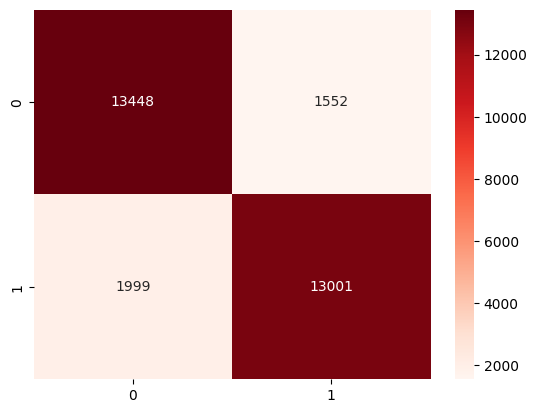

In [17]:
import seaborn as sns
CM = confusion_matrix(y_test, pred_labels)
sns.heatmap(CM, annot = True,fmt='g', cmap='Reds')
CM

In [18]:
from tensorflow import keras
model.save('/content/drive/MyDrive/my_lstm_model.keras')  # Save in .keras format to My Drive